In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, \
GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('./possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
df.shape

(104, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [6]:
df.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

### filling the null values

In [7]:
df.age.fillna(df.age.mean(),inplace=True)
df.footlgth.fillna(df.age.mean(),inplace=True)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [8]:
df.isnull().mean()*100

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

#### univariate analysis

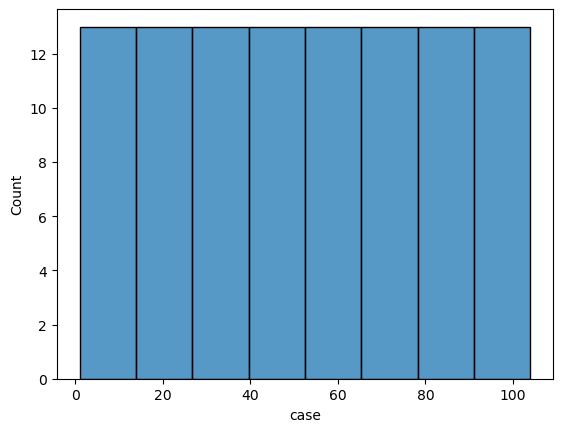

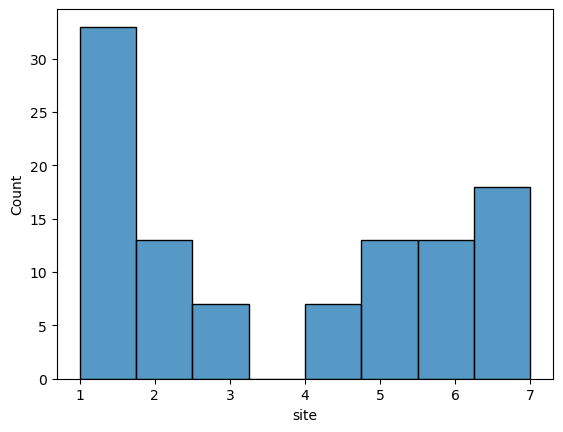

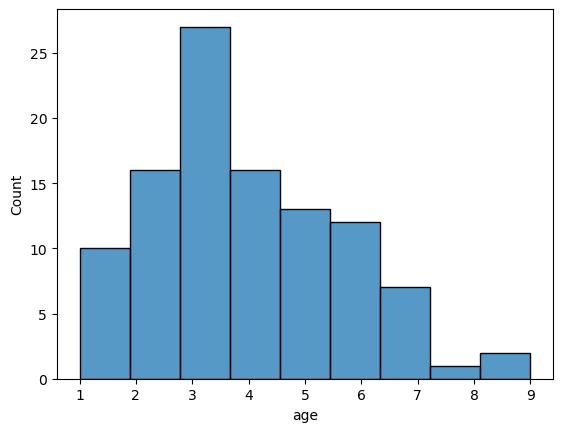

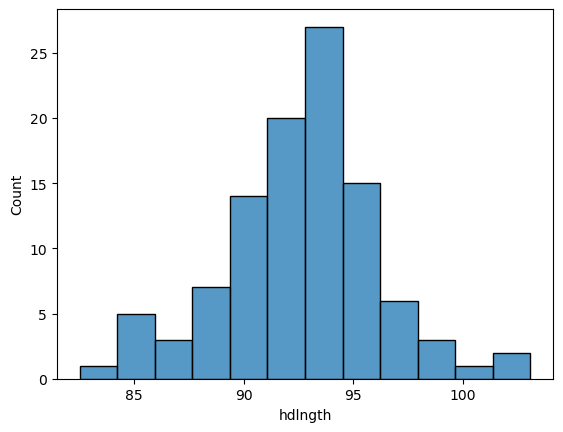

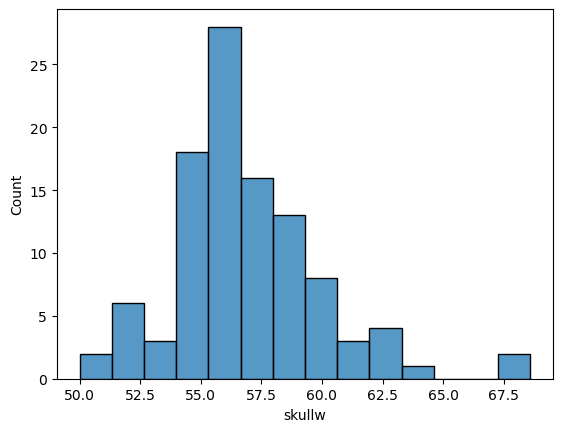

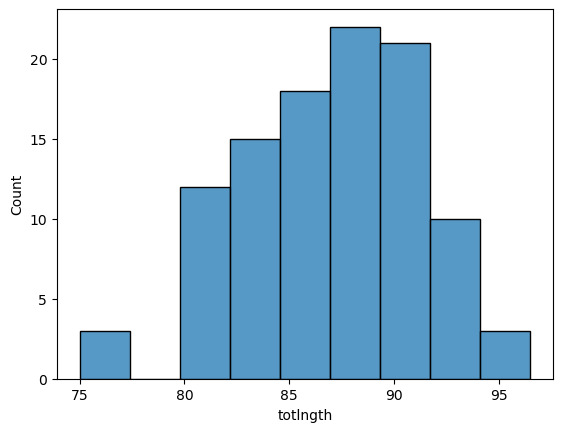

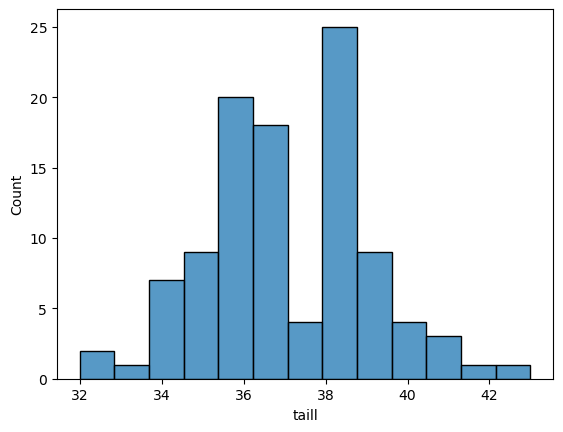

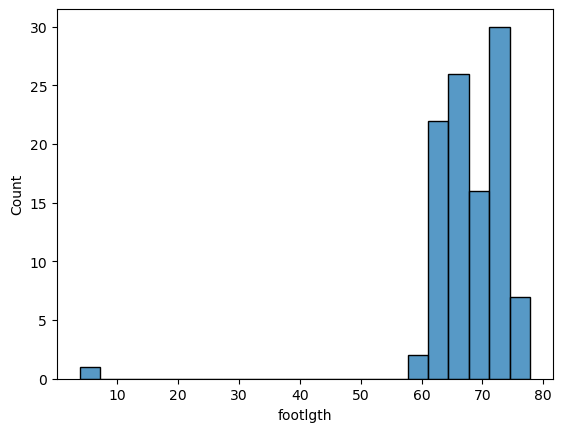

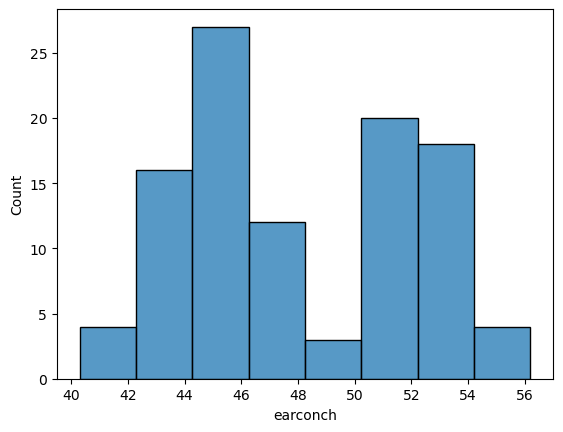

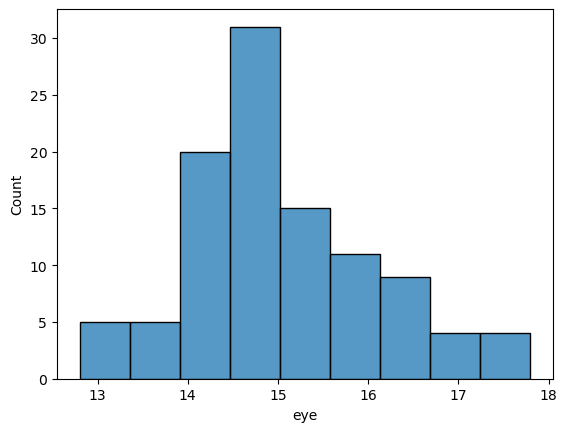

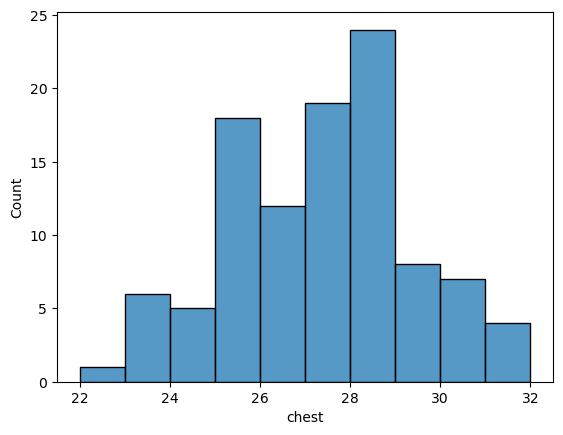

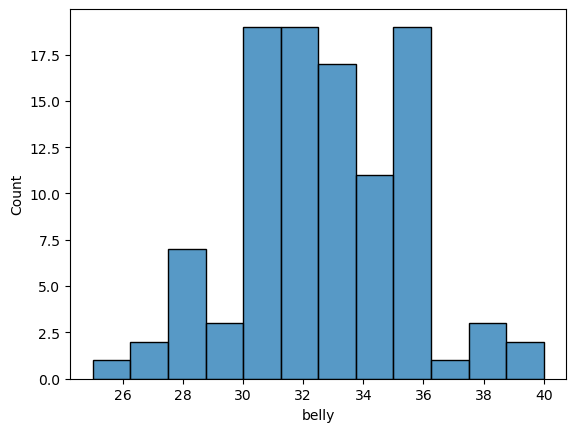

In [9]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

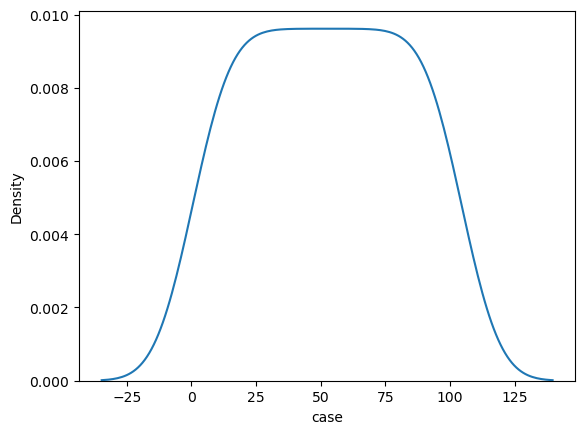

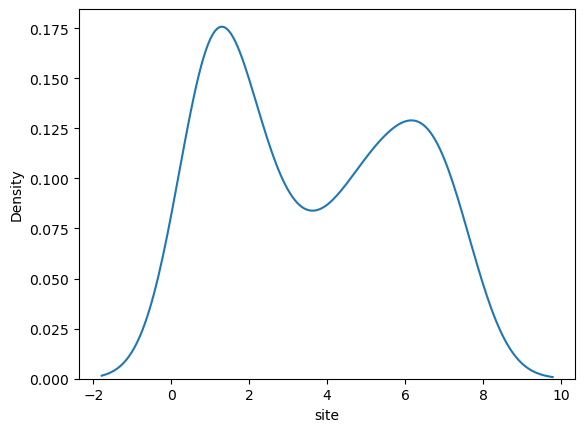

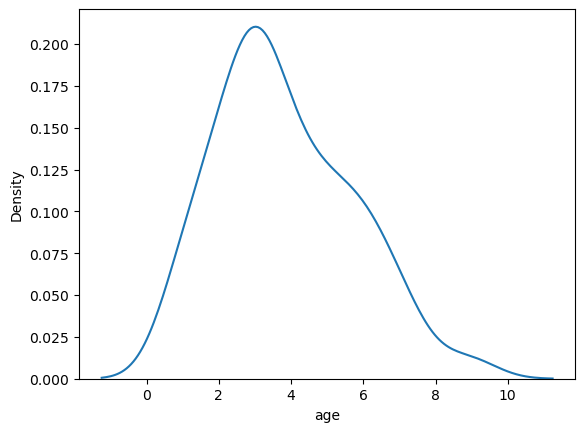

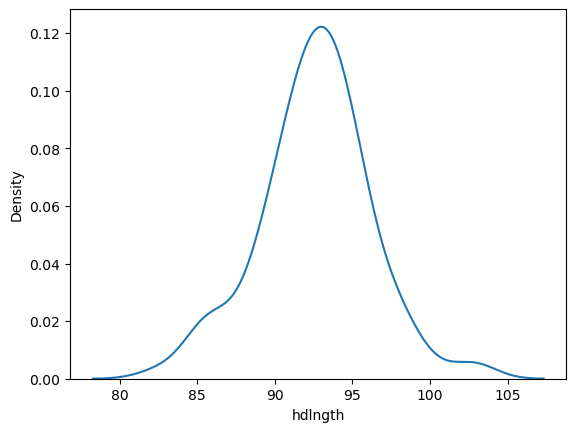

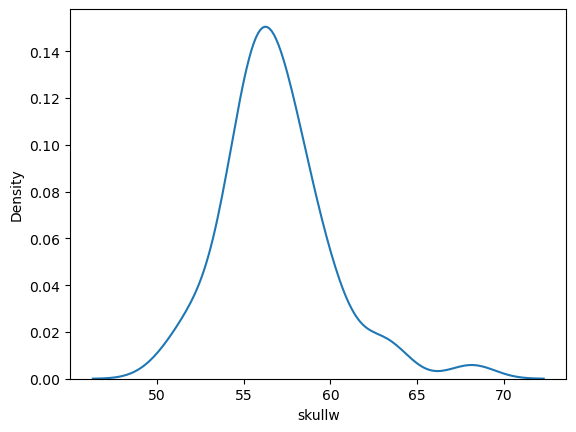

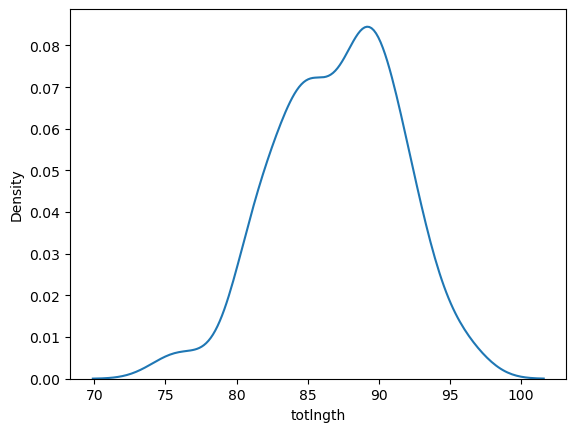

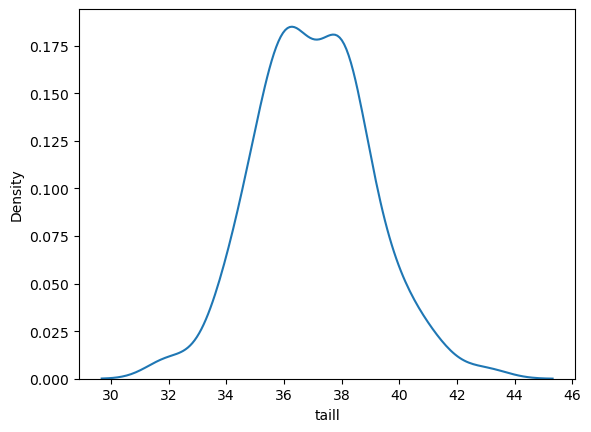

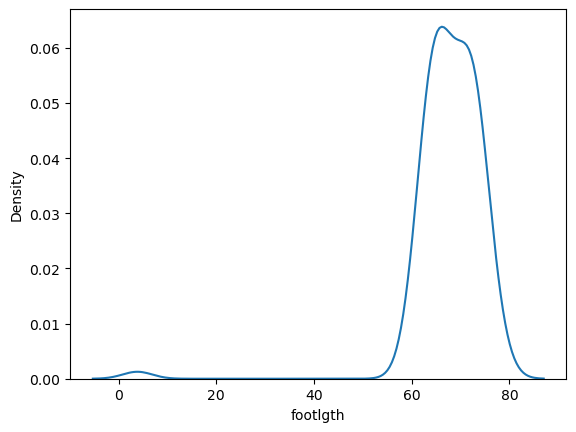

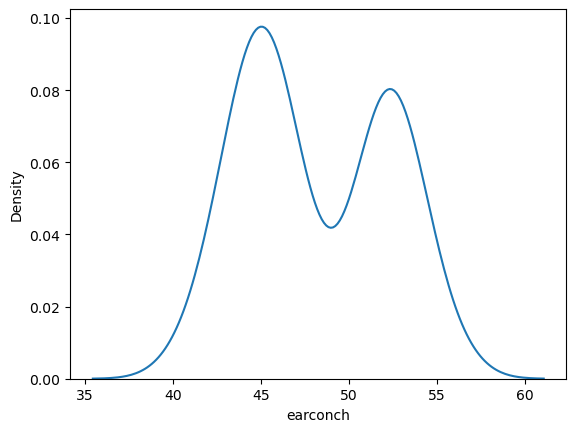

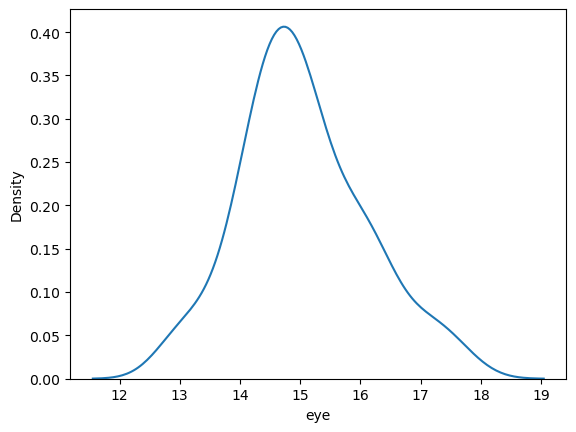

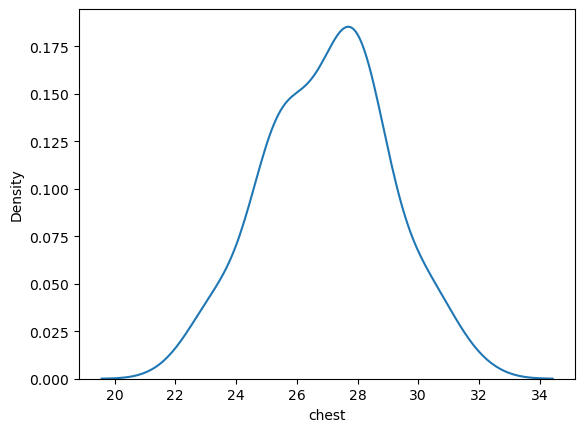

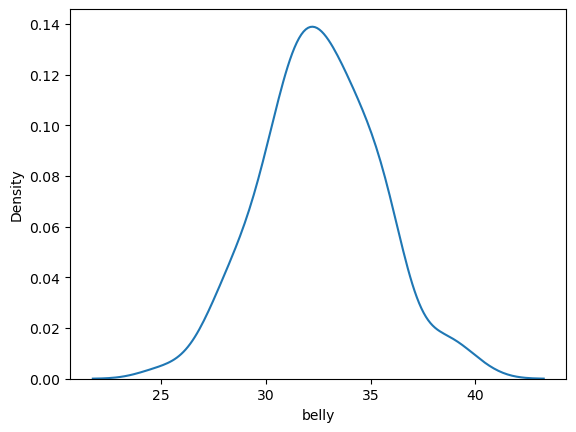

In [10]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show()

### setting the outlier limits

In [11]:
def outlier_limit(col):
    Q3,Q1 =np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL = outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

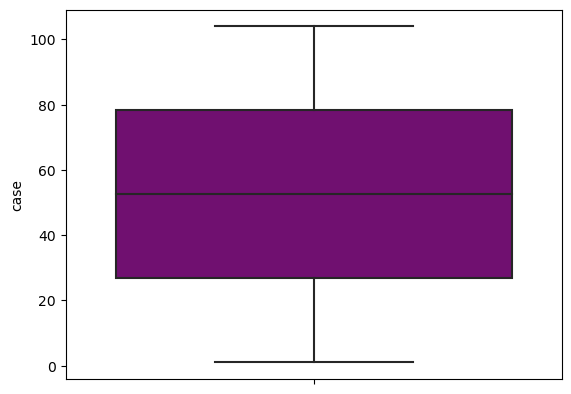

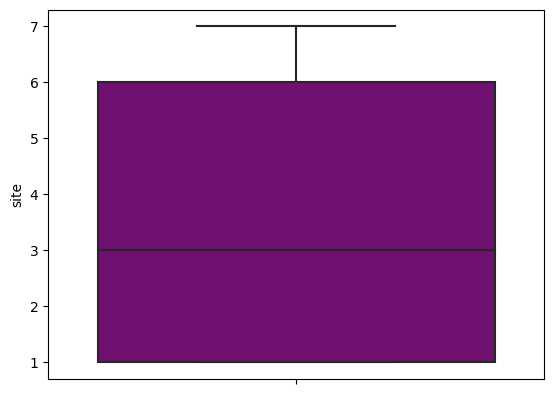

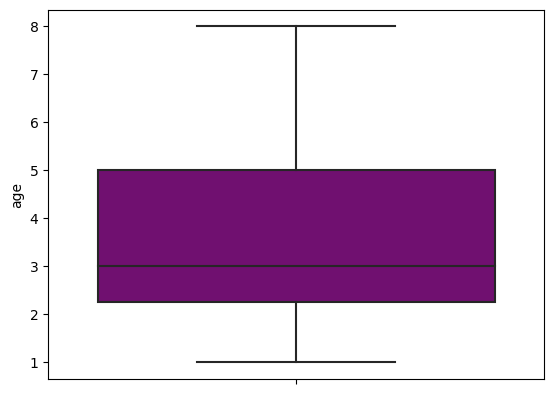

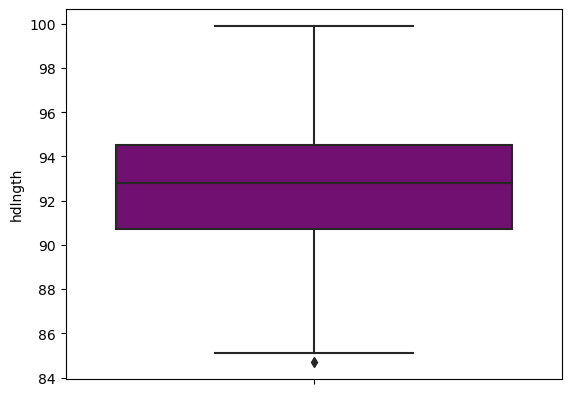

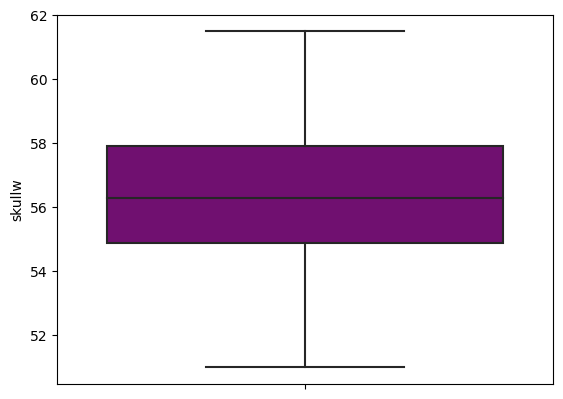

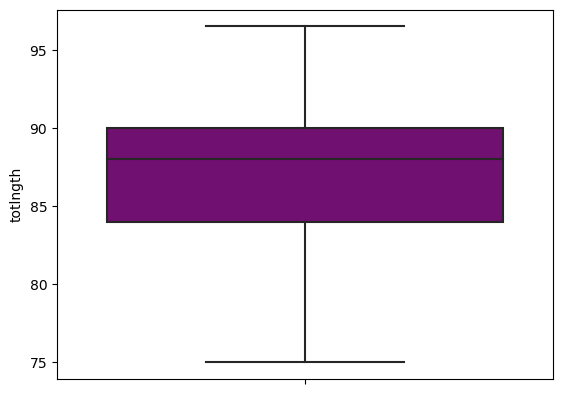

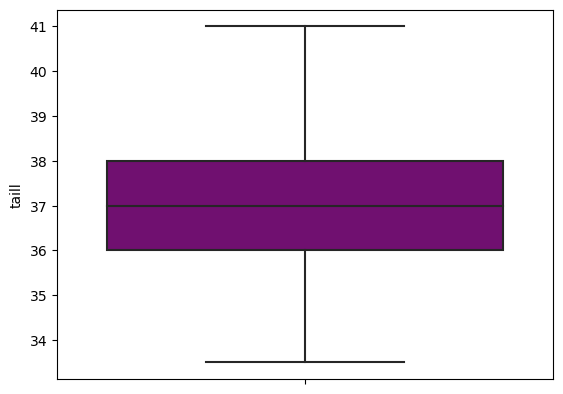

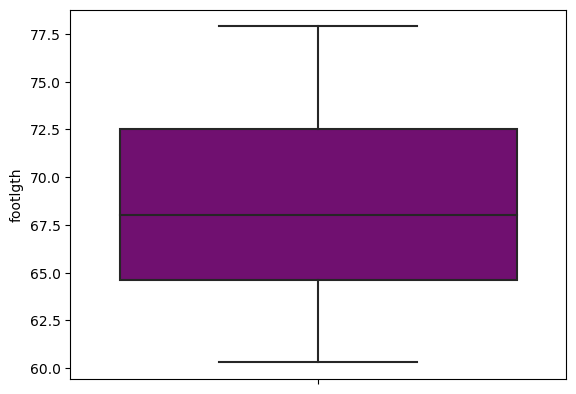

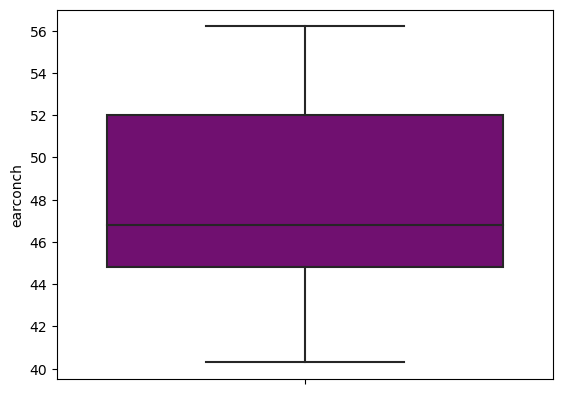

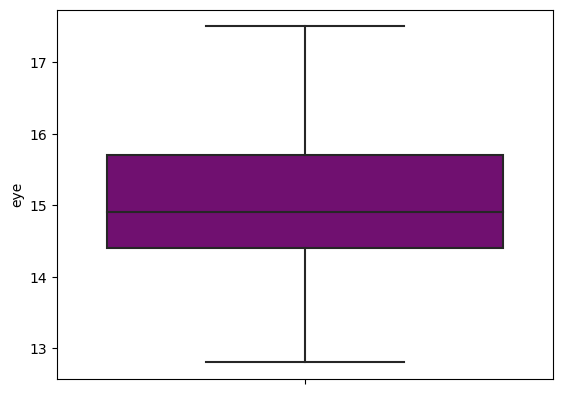

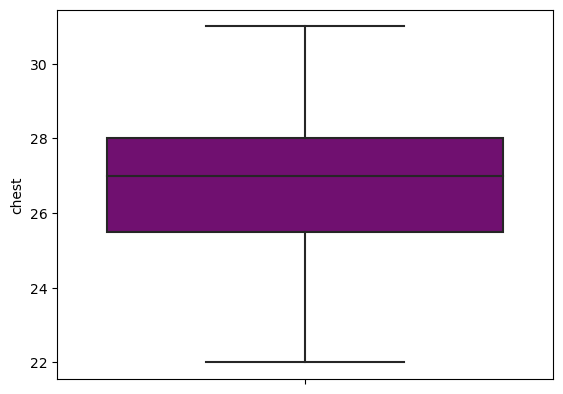

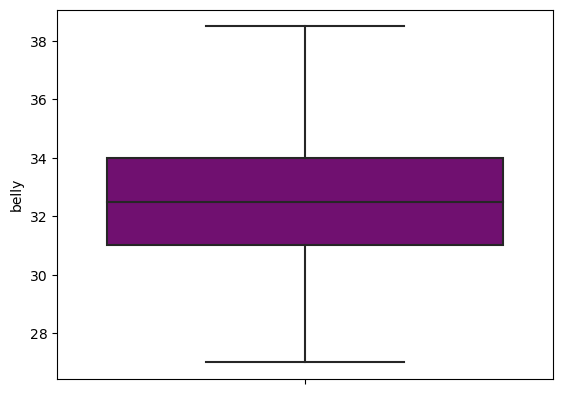

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i],color='purple')
        plt.show()

In [14]:
df.dropna(inplace=True)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,1.0,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2.0,1.0,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3.0,1.0,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4.0,1.0,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5.0,1.0,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100.0,7.0,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101.0,7.0,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102.0,7.0,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103.0,7.0,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


#### label encoding the categorical columns

In [15]:
le=LabelEncoder()

In [16]:
df['Pop']=le.fit_transform(df['Pop'])

In [17]:
df['sex']=le.fit_transform(df['sex'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      85 non-null     float64
 1   site      85 non-null     float64
 2   Pop       85 non-null     int32  
 3   sex       85 non-null     int32  
 4   age       85 non-null     float64
 5   hdlngth   85 non-null     float64
 6   skullw    85 non-null     float64
 7   totlngth  85 non-null     float64
 8   taill     85 non-null     float64
 9   footlgth  85 non-null     float64
 10  earconch  85 non-null     float64
 11  eye       85 non-null     float64
 12  chest     85 non-null     float64
 13  belly     85 non-null     float64
dtypes: float64(12), int32(2)
memory usage: 9.3 KB


#### checking the correlation with the target "footlgth"

<AxesSubplot:>

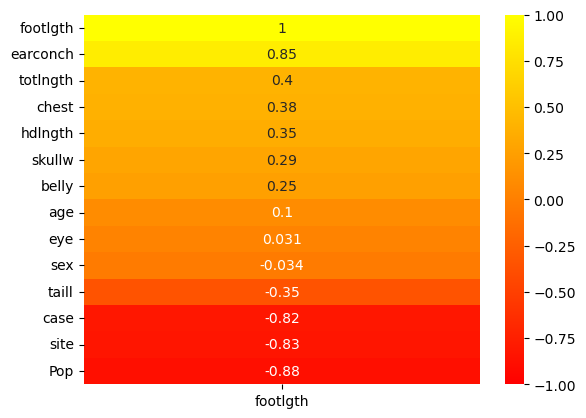

In [19]:
sns.heatmap(df.corr()[['footlgth']].sort_values(by='footlgth',ascending=False),vmin=-1,vmax=1,annot=True,cmap='autumn')

#### Lets take only the columns with good correlation witj the target

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      85 non-null     float64
 1   site      85 non-null     float64
 2   Pop       85 non-null     int32  
 3   sex       85 non-null     int32  
 4   age       85 non-null     float64
 5   hdlngth   85 non-null     float64
 6   skullw    85 non-null     float64
 7   totlngth  85 non-null     float64
 8   taill     85 non-null     float64
 9   footlgth  85 non-null     float64
 10  earconch  85 non-null     float64
 11  eye       85 non-null     float64
 12  chest     85 non-null     float64
 13  belly     85 non-null     float64
dtypes: float64(12), int32(2)
memory usage: 9.3 KB


In [21]:
x=df[['hdlngth','skullw','totlngth','earconch','chest','belly']].values

In [22]:
y=df[['footlgth']].values

#### feature scaling

In [23]:
sc=StandardScaler()

In [24]:
x=sc.fit_transform(x)

### splitting the data into training and testing set

In [25]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=0)

### Model building

In [29]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0),
}

In [30]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 55.210205121341374
training_score: 82.64593977959484
testing_score: 55.210205121341374
mae: 2.178384994038529
mse: 7.200649196596319
rmse_test: 2.683402540916349
****************************************************************************************************
model trained with Ridge
r2score: 56.54126677236766
training_score: 82.62398767703276
testing_score: 56.54126677236766
mae: 2.1533463805953805
mse: 6.986660540607866
rmse_test: 2.643229188059156
****************************************************************************************************
model trained with LinearSVR
r2score: -240.69376795954486
training_score: -74.40537992421308
testing_score: -240.69376795954486
mae: 6.421268278564348
mse: 54.771769176200756
rmse_test: 7.400795171885299
****************************************************************************************************
model trained with Lasso
r2score: 60.79221633944667
training_score: 73.08227595708482
testi